<a href="https://colab.research.google.com/github/jtj7387/AI_2020_spring/blob/master/08_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

In [1]:
#import tensorflow as tf 
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = [1, 2, 3] # x축 요소

In [4]:
y_train = [2+1 +0.1, 4+1 -0.2, 6+1 +0.15] # y축 요소에 자신이 정한 noise를 추가함

Text(0, 0.5, 'Y')

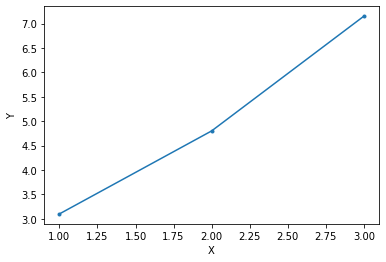

In [5]:
plt.plot(x_train, y_train,'.-') # x축과 y축을 기준으로 그래프 그린다. 
plt.xlabel('X') # x축을 X로 설정
plt.ylabel('Y') # y축을  Y로 설정

y=2x+1

y=wx+b

완전한 y=2x+1 그래프는 아니다. 내가 설정한 noise에의해 위와 같은 그래프 형태로 나온다.

**초기화, initialization**

In [6]:
w0 = 5; # 5로 바꿈
b0 = -7; # -7으로 바꿈

**Parameter 설정**

In [7]:
W = tf.Variable(w0*tf.ones([1]), name='weight') # tf는 tensor flow의 약자 # 컴퓨터가 임의로 찍어냄 # 숫자 1개만을 담는다는 1차원값의 리스트
b = tf.Variable(b0*tf.ones([1]), name='bias') 

**가설 Wx+b**

In [8]:
hypothesis = x_train * W + b # y=ax+b

**Cost & Loss Function**

In [9]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) # 선형 회귀 가설 그래프의 y값에서 데이터의 y값을 뺀 값에 제곱하여 오차범위 줄인다.
                                                       # cost는 낮을 수록 좋다.

**Optimizer 설정**

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) # Optimizer는 오류를 최소화 시키는 기능. 틀리면 다시 찍어내는 기능
#optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01) # GradientDescentOptimizer는 오류있을시 기울기를 감소하는 기능
train = optimizer.minimize(cost)

**Launch the graph in the session**

In [11]:
sess = tf.Session() # tf의 머신러닝을 킨다. 

**Initializes global variables in the graph**

In [12]:
sess.run(tf.global_variables_initializer())

**Run**

In [13]:
nb_epoch = 2000 # 2000번 반복

In [14]:
for i in range(100): # 기본적인 파이썬 문법
  if i % 20 ==0:
    print(i)

0
20
40
60
80


In [15]:
vw = [] # empty list #vw의 빈 리스트 생성 및 초기화
vb = [] # vb의 빈 리스트 생성 및 초기화
vcost = [] # vcost의 빈 리스트 생성 및 초기화

In [16]:
for step in range(nb_epoch+1): # 2000번 반복, 즉 0~2000번 반복
  sess.run(train) # 요소들을 계속 실행한다.
  w1 = sess.run(W)[0] # slope 기울기
  b1 = sess.run(b)[0] # bias y절편
  cost1 = sess.run(cost)
  vw.append(w1) # vw리스트에 w1이라는 요소를 추가한다.
  vb.append(b1) # vb리스트에 b1이라는 요소를 추가한다.
  vcost.append(cost1) # vcost리스트에 cost1이라는 요소를 추가한다.

  if step % 100 == 0: # 100번마다 결과 출력
     print(step, '--', cost1, '--', w1, '--', b1) # 몇 번 반복/ cost값(작을수록 좋다)/ 기울기 / y절편

0 -- 9.676142 -- 5.041 -- -6.9596667
100 -- 5.351698 -- 4.7059383 -- -5.127744
200 -- 3.315993 -- 4.132465 -- -3.8240955
300 -- 2.0580504 -- 3.6816592 -- -2.799309
400 -- 1.2807183 -- 3.327285 -- -1.9937339
500 -- 0.80037403 -- 3.0487149 -- -1.3604779
600 -- 0.50355047 -- 2.8297331 -- -0.8626811
700 -- 0.32013106 -- 2.6575933 -- -0.47136685
800 -- 0.20678939 -- 2.5222764 -- -0.1637587
900 -- 0.13675101 -- 2.4159043 -- 0.07804941
1000 -- 0.093471676 -- 2.3322866 -- 0.26813212
1100 -- 0.066727646 -- 2.2665555 -- 0.41755483
1200 -- 0.050201457 -- 2.2148848 -- 0.5350145
1300 -- 0.039989278 -- 2.1742666 -- 0.62734836
1400 -- 0.0336787 -- 2.142337 -- 0.69993174
1500 -- 0.029779235 -- 2.1172378 -- 0.7569886
1600 -- 0.027369542 -- 2.097507 -- 0.8018409
1700 -- 0.025880553 -- 2.0819974 -- 0.83709884
1800 -- 0.024960434 -- 2.0698054 -- 0.86481404
1900 -- 0.024391808 -- 2.0602207 -- 0.8866014
2000 -- 0.024040477 -- 2.0526867 -- 0.90372825


In [17]:
w1 = sess.run(W)[0] # slope 최종 기울기
b1 = sess.run(b)[0] # bias 최종 y절편
str1 = 'y={:.3}x + {:.3}'.format(w1, b1) # 소수점 2번째까지 표현한다.
print(w1, b1)
print(str1)

2.0526867 0.90372825
y=2.05x + 0.904


Text(0.5, 1.0, 'y=2.05x + 0.904')

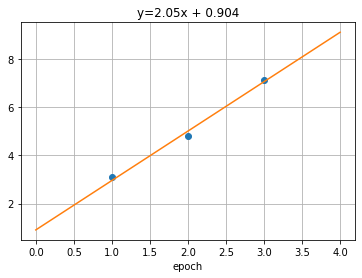

In [18]:
plt.figure(1)
plt.plot(x_train, y_train,'o')
x1 = np.min(x_train)-1, np.max(x_train)+1
y1 = np.dot(w1,x1) + b1
plt.plot(x1, y1)
plt.grid()
plt.xlabel('epoch') # 2000번 반복
plt.title(str1)

Text(0.5, 0, 'epoch')

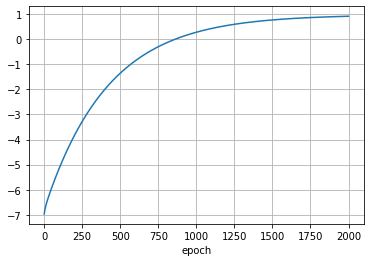

In [19]:
plt.plot(vb) # y절편의 추세를 보여주는 그래프
plt.grid()
plt.xlabel('epoch') 

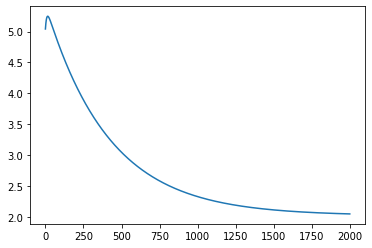

In [20]:
plt.plot(vw) # 기울기의 추세를 보여주는 그래프

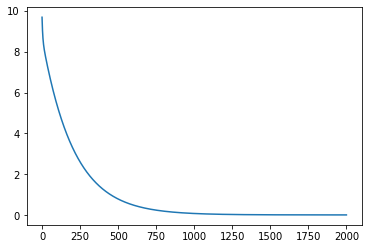

In [21]:
plt.plot(vcost) # cost의 추세를 보여주는 그래프// 코스트는 낮을수록 좋음